In this dataset we have 12 columns 

1_PassengerId	(personal information) 

2_Survived (Survived=1,not Survived=0)

3_Pclass there are three classes (1 = 1st, 2 = 2nd, 3 = 3rd)
	
4_Name (personal information) 

5_Sex (male,female)

6_Age	(Age in years)
  
7_SibSp  

         sibsp: The dataset defines family relations in this way...

         Sibling = brother, sister, stepbrother, stepsister

         Spouse = husband, wife (mistresses and fiancés were ignored)
  
8_Parch	 

         parch: The dataset defines family relations in this way...

         Parent = mother, father

         Child = daughter, son, stepdaughter, stepson

         Some children travelled only with a nanny, therefore parch=0 for them.
    
9_Ticket (Ticket number)
    
10_Fare	(Passenger fare 'price')
    
11_Cabin (Cabin number)
    
12_Embarked (Port of Embarkation where C = Cherbourg, Q = Queenstown,           S=Southampton)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data plotting 
import matplotlib.pyplot as plt # data plotting
from sklearn.preprocessing import StandardScaler # data processing, make data have same scale
from sklearn.preprocessing import OneHotEncoder # data processing,convert data to dummies variables
from sklearn.model_selection import GridSearchCV  # Search the best parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score # evaluating the model
from sklearn.ensemble import RandomForestClassifier  # import Random Forest model classifier
from sklearn.ensemble import ExtraTreesClassifier # import Extra Trees model classifier 
from sklearn.ensemble import VotingClassifier # import voting model classifier 
from sklearn.ensemble import BaggingClassifier # import Bagging model classifier 
from sklearn.ensemble import AdaBoostClassifier  # import AdaBoost model classifier 
from sklearn.ensemble import GradientBoostingClassifier  #import Gradient Boosting model classifier 
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV  # import Logistic Regression model classifier 
from sklearn.neighbors import KNeighborsClassifier # import K Nearest Neighbores model classifier 
from sklearn.tree import DecisionTreeClassifier # import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # import Gaussian Naive Bayes Classifier
from sklearn.svm import SVC # import suporrt vector machine moled Classifier 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_set = pd.read_csv("train.csv") 
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
1,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
2,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [3]:
test_set = pd.read_csv("test.csv")
test_set.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
1,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
2,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
3,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
4,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [4]:
submission = pd.read_csv("submissions/sample_submission.csv")
submission.head()

,PassengerId,Survived
0,710,0
1,440,0
2,841,1
3,721,1
4,40,0


# Explore the Data

In [5]:
print(f'number of rows in train set {train_set.shape[0]}')
print(f'number of columns in train set {train_set.shape[1]}')

number of rows in train set 712
number of columns in train set 12


In [6]:
#show Type of data
train_set.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


In [7]:
#show descriptive statistic for float and int data
train_set.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#show descriptive statistic for object data
train_set.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,712,712,712,159,710
unique,712,2,558,117,3
top,"Partner, Mr. Austen",male,CA. 2343,C23 C25 C27,S
freq,1,467,7,4,525


In [9]:
print(f'number of rows in test set {train_set.shape[0]}')
print(f'number of columns in test set {train_set.shape[1]}')

number of rows in test set 712
number of columns in test set 12


In [10]:
#show Type of data
test_set.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Pclass       179 non-null    int64  
 2   Name         179 non-null    object 
 3   Sex          179 non-null    object 
 4   Age          142 non-null    float64
 5   SibSp        179 non-null    int64  
 6   Parch        179 non-null    int64  
 7   Ticket       179 non-null    object 
 8   Fare         179 non-null    float64
 9   Cabin        45 non-null     object 
 10  Embarked     179 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 15.5+ KB


In [11]:
#show descriptive statistic for float and int data
test_set.describe() 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,179.000000,179.000000,142.000000,179.000000,179.000000,179.000000
mean,437.111732,2.223464,30.505845,0.402235,0.391061,30.684473
std,260.349331,0.877501,14.656239,0.730703,0.863185,39.447725
min,6.000000,1.000000,0.830000,0.000000,0.000000,0.000000
25%,217.500000,1.000000,20.000000,0.000000,0.000000,7.895800
50%,423.000000,3.000000,29.000000,0.000000,0.000000,14.500000
75%,656.000000,3.000000,38.750000,1.000000,0.000000,32.410400
max,890.000000,3.000000,71.000000,4.000000,5.000000,262.375000


In [12]:
#show descriptive statistic for object data
test_set.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,179,179,179,45,179
unique,179,2,169,42,3
top,"Moubarek, Master. Halim Gonios (""William George"")",male,347088,C126,S
freq,1,110,3,2,119


In [13]:
# a better style for plotting
plt.style.use('ggplot')

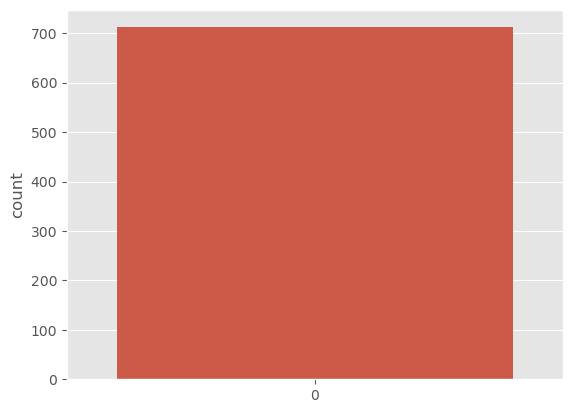

In [14]:
sns.countplot(train_set['Survived'],label='count');

In [15]:
idx = train_set.Survived.value_counts().index
val1 = train_set.Survived.value_counts().values
val2 = train_set.Survived.value_counts(normalize=True).values

d1 = pd.DataFrame(val1,index=idx,columns=['count'])
d2 = pd.DataFrame(val2,index=idx,columns=['ratio'])

pd.concat([d1,d2],axis=1)

,count,ratio
Survived,,
0,444,0.623596
1,268,0.376404


The ratio who survived in train set  0.383838 

The ratio who not survived in train set 0.616162

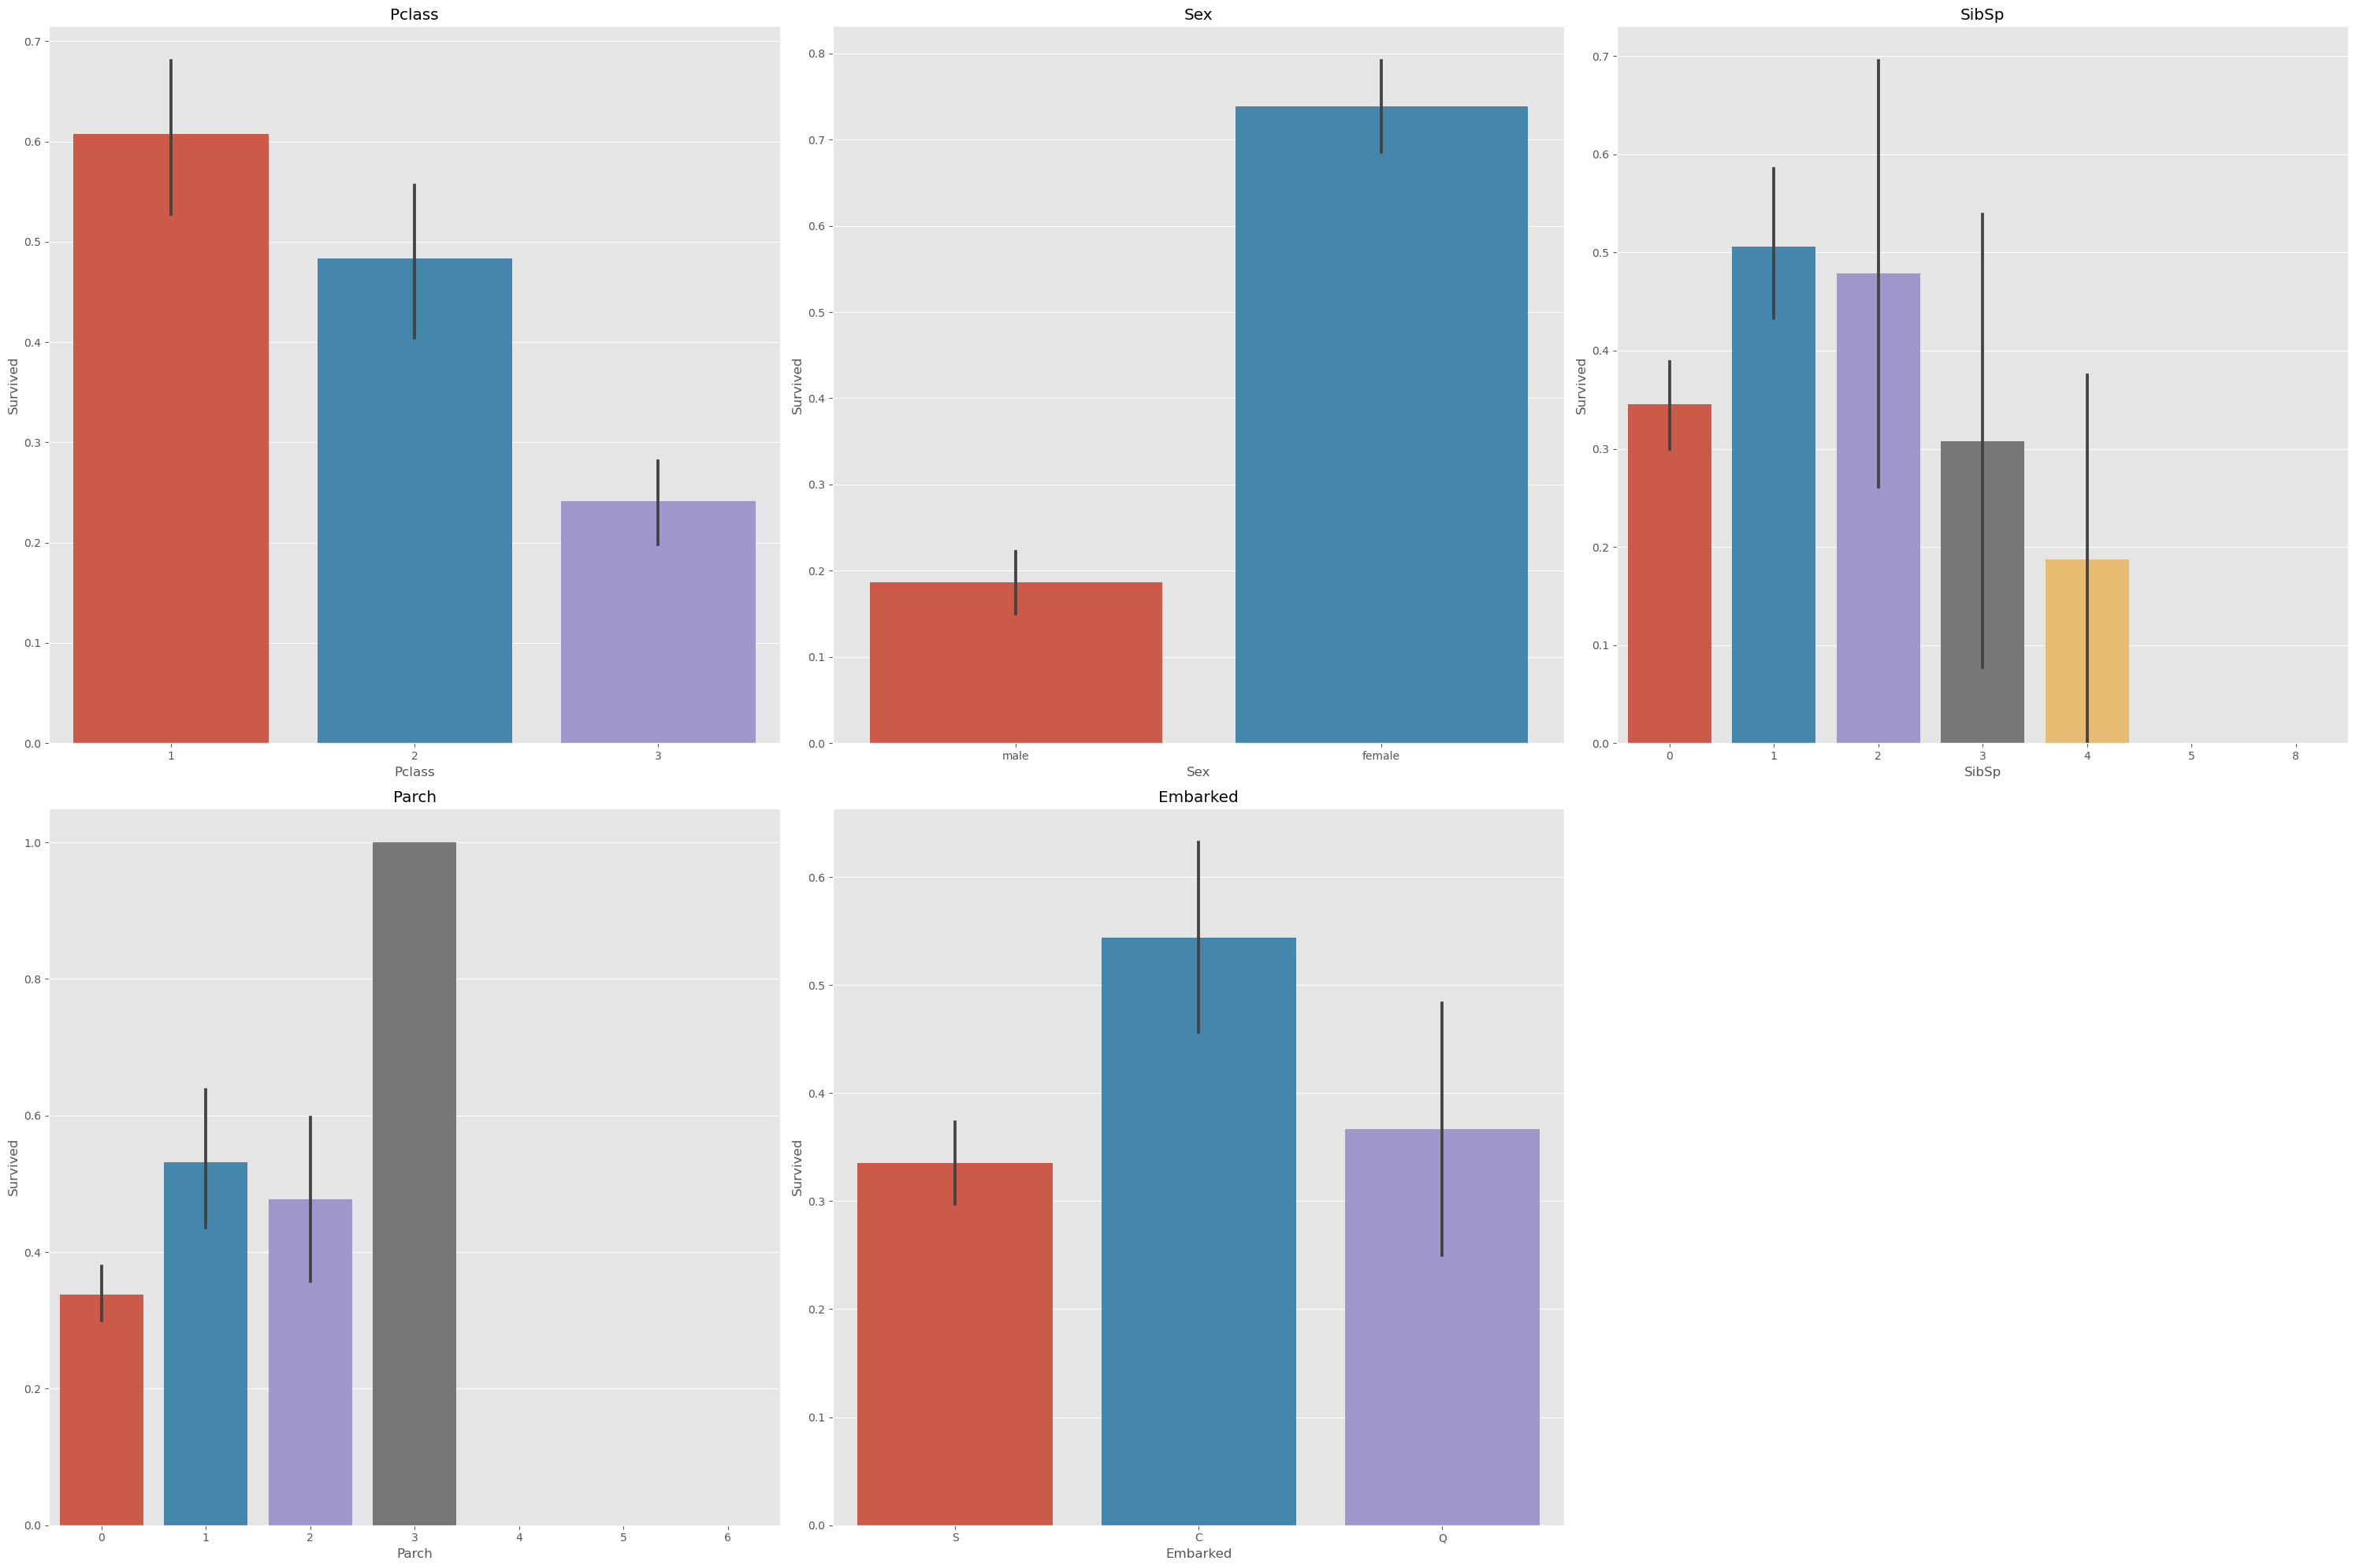

In [16]:
fig,axList = plt.subplots(nrows = 2, ncols = 3)
axList = axList.flatten()
cols = ['Pclass','Sex','SibSp','Parch','Embarked']
fig.set_size_inches(30, 20)

axList[-1].axis('off')

for ax,col in zip(axList,cols):
    sns.barplot(x=col , y="Survived", data=train_set, ax=ax)
    ax.set(title=col)
plt.tight_layout()

In [17]:
df = pd.DataFrame({'count':train_set.groupby('Pclass')['Survived'].value_counts(),
                   'Percentage':train_set.groupby('Pclass')['Survived'].value_counts(normalize=True)})
df

count  Percentage
Pclass Survived                   
1      1            99    0.607362
       0            64    0.392638
2      0            78    0.516556
       1            73    0.483444
3      0           302    0.758794
       1            96    0.241206

Percentage of survivors with first class 0.629630

Percentage of survivors with second class 0.472826

Percentage of survivors with third class 0.242363

In [18]:
df = pd.DataFrame({'count':train_set.groupby('Sex')['Survived'].value_counts(),
                   'Percentage':train_set.groupby('Sex')['Survived'].value_counts(normalize=True)})
df

count  Percentage
Sex    Survived                   
female 1           181    0.738776
       0            64    0.261224
male   0           380    0.813704
       1            87    0.186296

Percentage of male survivors 0.188908

Percentage of female survivors 0.742038

In [19]:
df = pd.DataFrame({'count':train_set.groupby('SibSp')['Survived'].value_counts(),
                   'Percentage':train_set.groupby('SibSp')['Survived'].value_counts(normalize=True)})
df

count  Percentage
SibSp Survived                   
0     0           317    0.654959
      1           167    0.345041
1     1            83    0.506098
      0            81    0.493902
2     0            12    0.521739
      1            11    0.478261
3     0             9    0.692308
      1             4    0.307692
4     0            13    0.812500
      1             3    0.187500
5     0             5    1.000000
8     0             7    1.000000

In [20]:
df = pd.DataFrame({'count':train_set.groupby('Parch')['Survived'].value_counts(),
                   'Percentage':train_set.groupby('Parch')['Survived'].value_counts(normalize=True)})
df

count  Percentage
Parch Survived                   
0     0           358    0.661738
      1           183    0.338262
1     1            50    0.531915
      0            44    0.468085
2     0            35    0.522388
      1            32    0.477612
3     1             3    1.000000
4     0             3    1.000000
5     0             3    1.000000
6     0             1    1.000000

In [21]:
df = pd.DataFrame({'count':train_set.groupby('Embarked')['Survived'].value_counts(),
                   'Percentage':train_set.groupby('Embarked')['Survived'].value_counts(normalize=True)})
df

count  Percentage
Embarked Survived                   
C        1            68    0.544000
         0            57    0.456000
Q        0            38    0.633333
         1            22    0.366667
S        0           349    0.664762
         1           176    0.335238

Percentage of survivors who left  Cherbourg  port 0.553571

Percentage of survivors who left  Queenstown  port 0.389610

Percentage of survivors who left  Southampton  port 0.336957

In [22]:
#show Box Plot to see outlier 
def box_plot(df):
    fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize=(20,10))
    sns.boxplot(df['Fare'], ax=ax[0])
    sns.boxplot(df['Age'], ax=ax[1]);

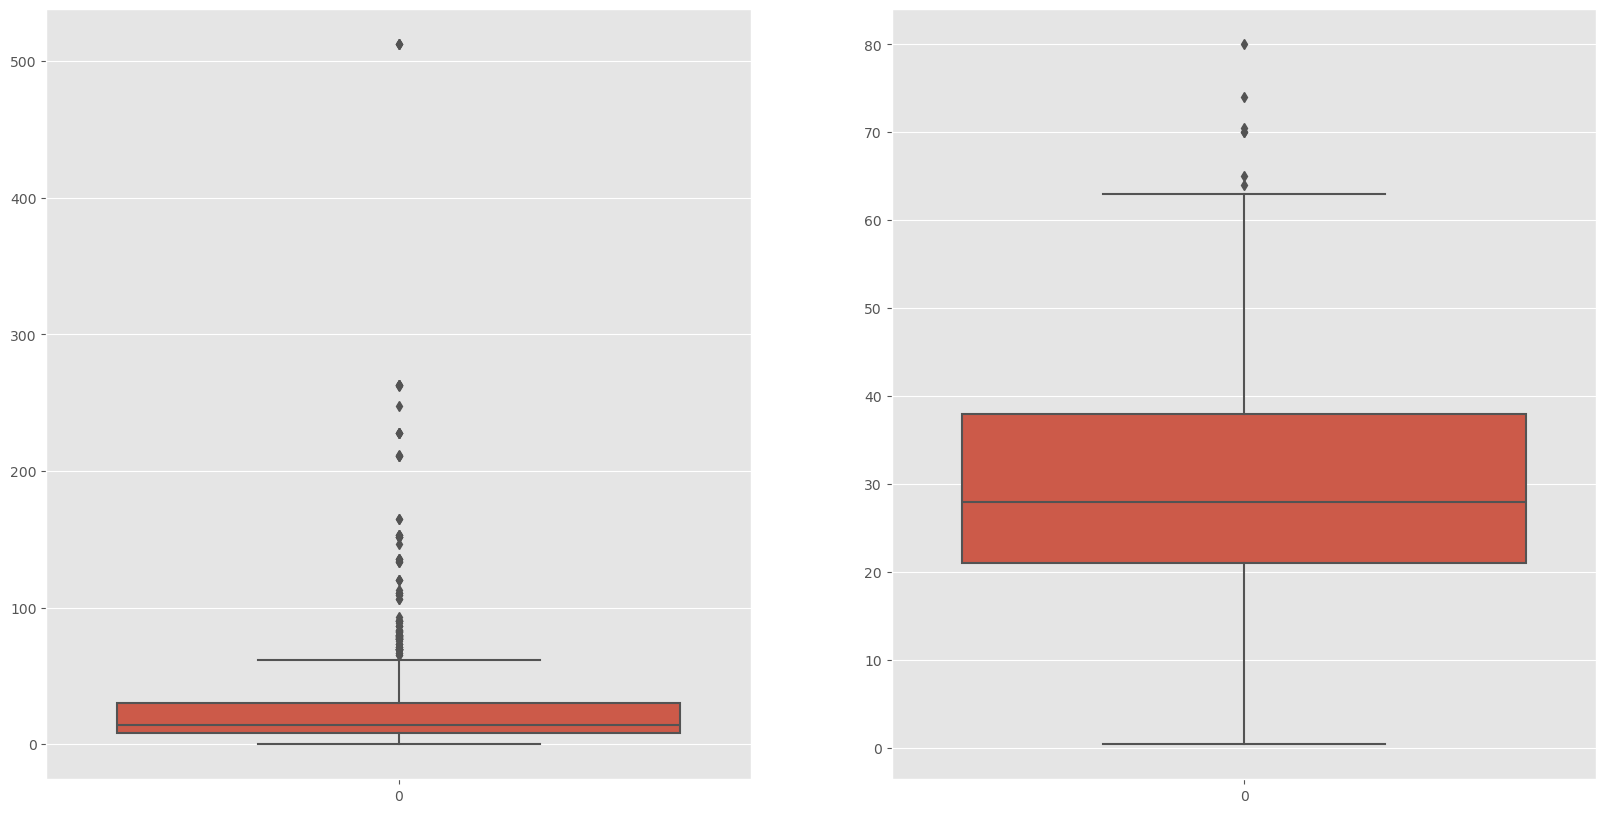

In [23]:
box_plot(train_set)

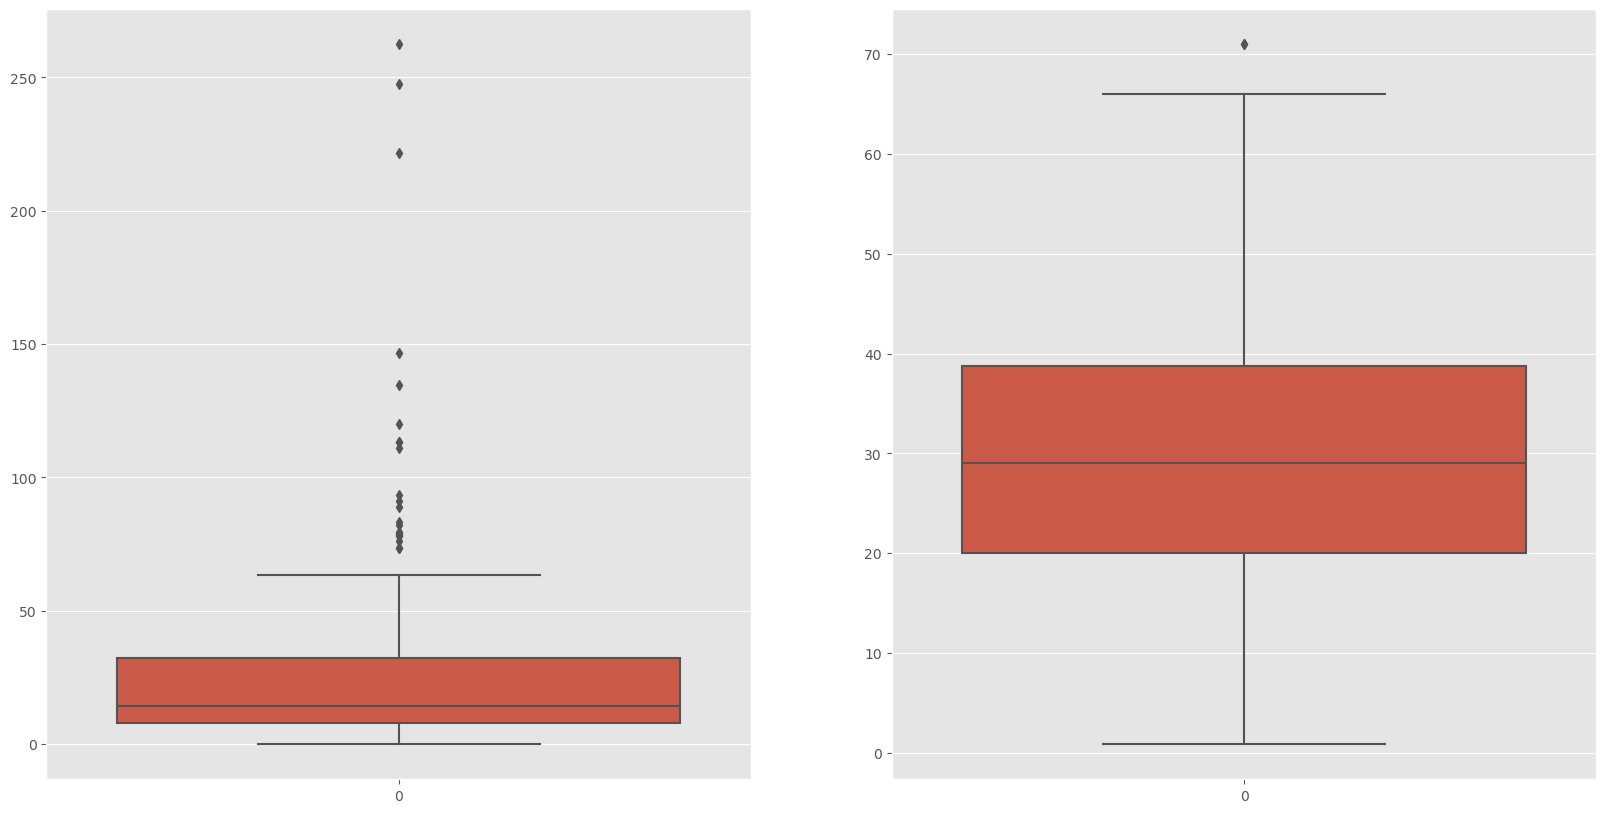

In [24]:
box_plot(test_set)

In [25]:
#for remove outlier in train_set and test
def remove_outlier(df): 
    
    lis = list()

    for col in ['Fare','Age']:
    
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
    
        iqr = q3 - q1
    
        max_limit = q3 + iqr*1.5
        min_limit = q1 - iqr*1.5
    
        outlier = [x for x in df[col] if x > max_limit or x < min_limit]
        lis.append(len(outlier))
    
        df[col] = df[col].replace(outlier,-1)
        df[col] = df[col].replace(-1,df[col].mean())
        
    # count and rario of outlier data in Fare and Age columns
    df_outlier = pd.DataFrame(lis,index=['Fare outlier','Age outlier'],columns=['count'])
    df_outlier['ratio'] = df_outlier['count']/len(train_set)  
    
    return df_outlier
            

In [26]:
remove_outlier(train_set)

,count,ratio
Fare outlier,96,0.134831
Age outlier,7,0.009831


the ratio of outlier in Fare column 0.053872

the ratio of outlier in Age column 0.004489

In [27]:
remove_outlier(test_set)

,count,ratio
Fare outlier,22,0.030899
Age outlier,2,0.002809


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


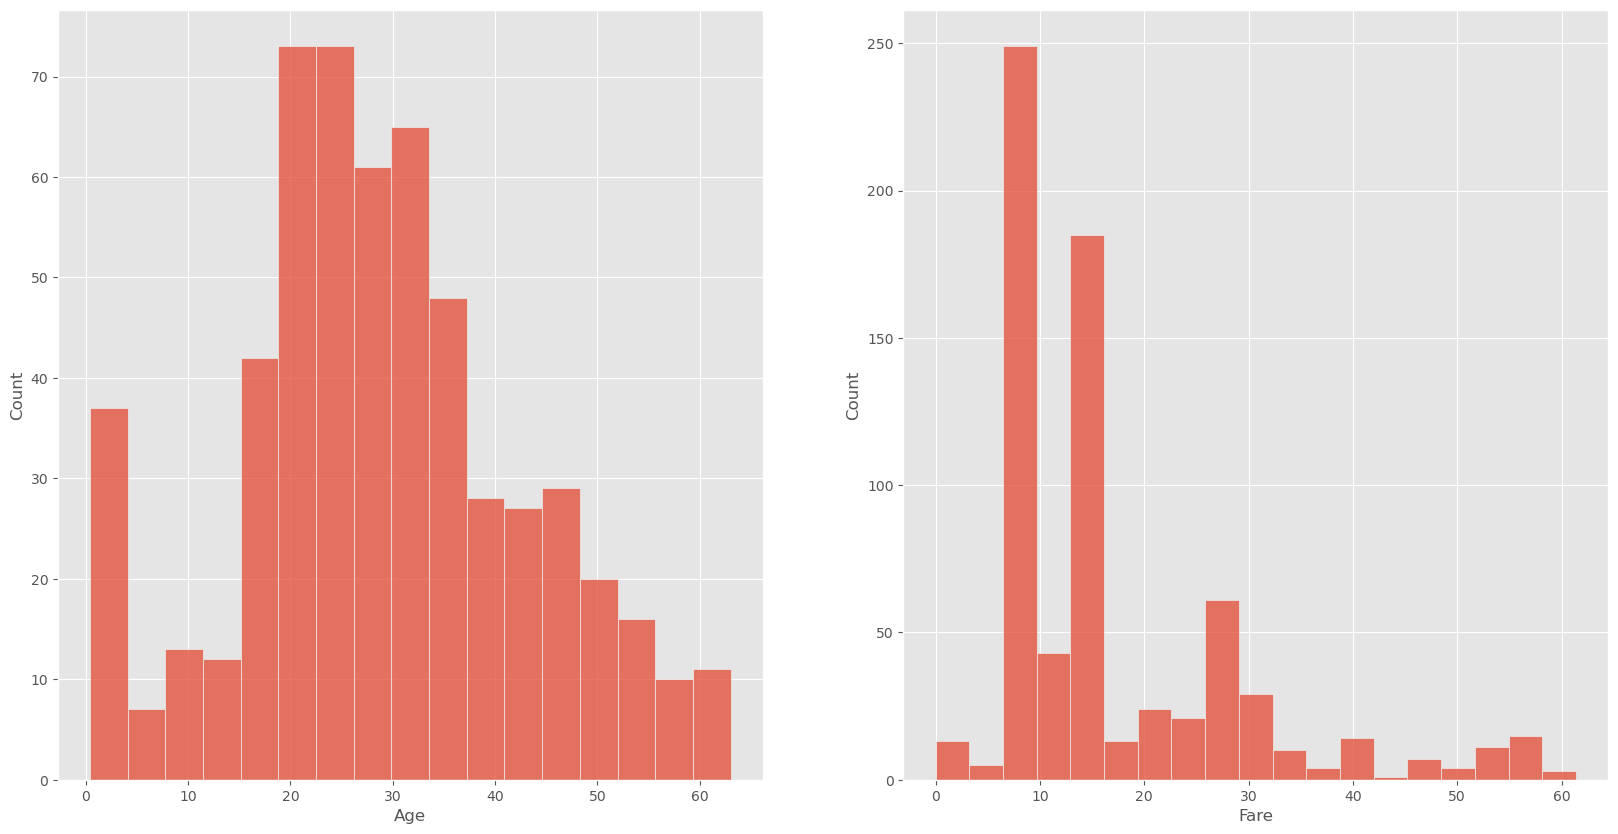

In [28]:
#show Age and Fare distribution
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize=(20,10))
sns.histplot(train_set['Age'], ax=ax[0])
sns.histplot(train_set['Fare'], ax=ax[1]);

In [29]:
train_set[['Age','Fare']].skew().to_frame(name='skewness')

,skewness
Age,0.159330
Fare,1.621955


the skewness in Age is not big, but in Far is big 

<Axes: >

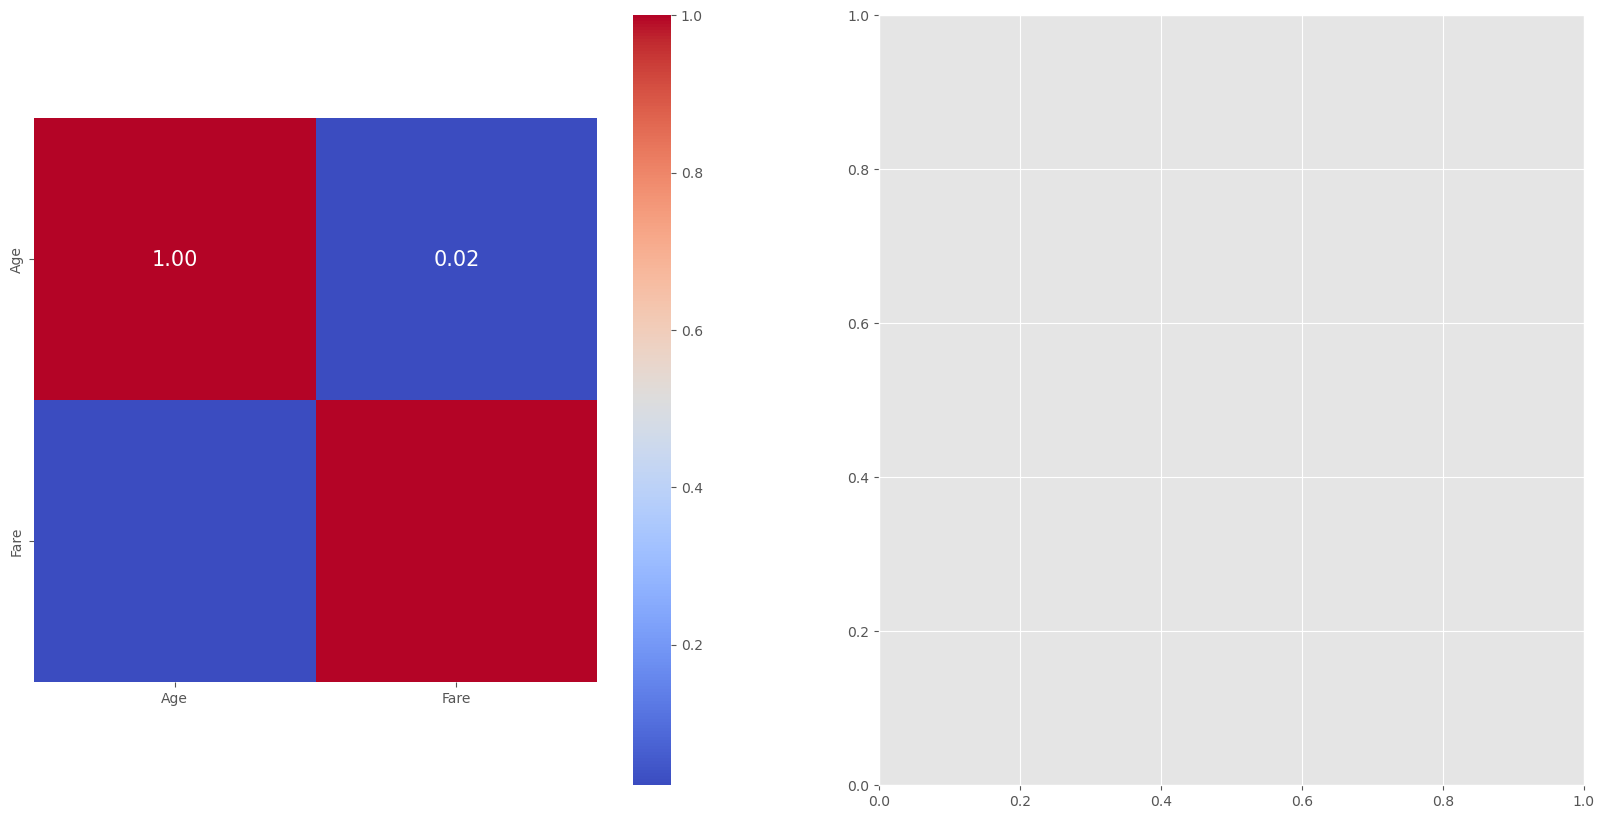

<Figure size 1000x1000 with 0 Axes>

In [31]:
corr = train_set[['Age','Fare']].corr()# .corr is used for find corelation
fig,ax = plt.subplots(1,2,figsize=(20,10))
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= ['Age','Fare'], yticklabels= ['Age','Fare'],cmap= 'coolwarm',ax=ax[0])


There is no linear correlation between age and Fare

# Data Preprocessing

In [32]:
#convert type of data from string to number 
# Sex column (male=0,female=1)
# Embarked column (C=1,S=2,Q=3)
train_set['Sex'] = train_set['Sex'].replace({'male': 0 , 'female': 1})
test_set['Sex'] = test_set['Sex'].replace({'male': 0 , 'female':1 })
train_set['Embarked'] = train_set['Embarked'].replace({'C': 1 , 'S': 2,'Q': 3})
test_set['Embarked'] = test_set['Embarked'].replace({'C': 1 , 'S': 2,'Q': 3})

In [33]:
#show missing values
nan_value = train_set.isnull().sum()
nan_value = nan_value[nan_value>0]
nan_value_df = pd.DataFrame(nan_value.values, index=nan_value.index, columns=['count'])
nan_value_df['ratio'] = nan_value_df['count']/len(train_set)
nan_value_df

,count,ratio
Age,140,0.196629
Cabin,553,0.776685
Embarked,2,0.002809


train_set

ratio of missing values in the age column 0.198653

ratio of missing values in the Cabin column 0.771044 (It's big)

ratio of missing values in the Embarked column 0.002245


In [34]:
nan_value1 = test_set.isnull().sum()
nan_value1 = nan_value1[nan_value1>0]
nan_value1_df = pd.DataFrame(nan_value1.values, index=nan_value1.index, columns=['count'])
nan_value1_df['ratio'] = nan_value1_df['count']/len(test_set)
nan_value1_df

,count,ratio
Age,37,0.206704
Cabin,134,0.748603


test_set 

ratio of missing values in the age column 0.205742

ratio of missing values in the Cabin column0.782297 (It's big)

ratio of missing values in the Fare column 0.002392

In [35]:
train_set['Embarked'].fillna(train_set['Embarked'].mode().iloc[0],inplace=True)
test_set['Fare'].fillna(test_set['Fare'].mean(),inplace=True)

replace missing values to mode value in Embarked column

replace missing values to mean value in Fare column

In [37]:
train_set['Age'].fillna(train_set['Age'].mean(),inplace=True)
test_set['Age'].fillna(test_set['Age'].mean(),inplace=True)

replace missing values to mean value in Age value

these "Cabin","Name","PassengerId" and "Ticket" columns are not important for machine learning model, so we delete them

In [38]:
train_set.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)
test_set.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)

In [39]:
X_train_set = train_set.drop(['Survived'],axis=1)
Y_train_set = train_set['Survived']

I will merge train_set and test_set, because in test_set in Parch column we have  value 9, but in train_set we don't have this value.

if we implement pd.get_dummies(data,columns=['Pclass','SibSp','Parch','Embarked'], drop_first=True) in train_set and test_set Separately , they will be different 

I mean, it will appear Parch_9 column in test_set and It will not appear in train_set


In [40]:
data = pd.concat([X_train_set,test_set])

In [41]:
data = pd.get_dummies(data,columns=['Pclass','SibSp','Parch','Embarked'], drop_first=True)

In [43]:
data

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_2.0,Embarked_3.0
0,0,45.500000,28.5000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,23.000000,13.0000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,32.000000,7.9250,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,26.000000,7.8542,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1,6.000000,31.2750,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0,17.000000,7.1250,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
175,0,29.921222,7.2250,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,1,38.000000,31.3875,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False
177,1,17.000000,10.5000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [42]:
X_train_set = data.iloc[:891]
test_set = data.iloc[891:]

In [44]:
X_train = np.asarray(X_train_set)
y_train = np.asarray(Y_train_set)
X_test = np.asarray(test_set)
y_test = np.asarray(submission['Survived'])

In [45]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

ValueError: Found array with 0 sample(s) (shape=(0, 19)) while a minimum of 1 is required by StandardScaler.

K Nearest Neighbors model

In [47]:
KNN = KNeighborsClassifier().fit(X_train_scaler,y_train)
y_pred = KNN.predict(X_test_scaler)
accuracy_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [891, 712]

In [48]:
param_grid = {'n_neighbors':[x for x in range(20)]}

GV_KNN = GridSearchCV(KNeighborsClassifier(),
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_KNN.fit(X_train_scaler,y_train)
GV_KNN.best_estimator_

ValueError: Found input variables with inconsistent numbers of samples: [891, 712]

In [46]:
y_pred = GV_KNN.predict(X_test_scaler)
print(classification_report(y_pred, y_test))

NameError: name 'GV_KNN' is not defined

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

Decision Tree model

In [ ]:
DTC = DecisionTreeClassifier().fit(X_train_scaler,y_train)
y_pred = DTC.predict(X_test_scaler)
accuracy_score(y_test,y_pred)

In [ ]:
param_grid = {'max_depth':[x for x in range(20)],
              'min_samples_split':[x for x in range(2,100,10)],
              'max_features':[x for x in range(20)]}

GV_DT = GridSearchCV(DecisionTreeClassifier(),
                   param_grid=param_grid, 
                   scoring='accuracy',
                   n_jobs=-1)

GV_DT.fit(X_train_scaler,y_train)
GV_DT.best_estimator_              

In [ ]:
y_pred = GV_DT.predict(X_test_scaler)
print(classification_report(y_pred,y_test))

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

Logistic Regression model

In [ ]:
LR = LogisticRegression().fit(X_train_scaler,y_train)
y_pred = LR.predict(X_test_scaler)
accuracy_score(y_test,y_pred)

In [ ]:
param_grid = {'penalty':['l1', 'l2', 'elasticnet'],
              'max_iter':[20,50,100,150,170,200]}
GV_LR = GridSearchCV(LogisticRegression(),
                     param_grid=param_grid,
                     scoring='accuracy',
                     n_jobs=-1)
GV_LR.fit(X_train_scaler,y_train)
GV_LR.best_estimator_

In [ ]:
y_pred = LR.predict(X_test_scaler)
print(classification_report(y_pred,y_test))

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

Support Vector Machine model

In [ ]:
SVM = SVC().fit(X_train_scaler,y_train)
y_pred = SVM.predict(X_test_scaler)
accuracy_score(y_test,y_pred)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

GV_SVM = GridSearchCV(SVC(),
                     param_grid=param_grid,
                     scoring='accuracy',
                     n_jobs=-1)

GV_SVM.fit(X_train_scaler,y_train)
GV_SVM.best_estimator_

In [ ]:
y_pred = GV_SVM.predict(X_test_scaler)
print(classification_report(y_pred,y_test))

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

Random Forest model

In [ ]:
RF = RandomForestClassifier().fit(X_train_scaler,y_train)
y_pred = RF.predict(X_test_scaler)
accuracy_score(y_test,y_pred)

In [ ]:
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]}
GV_RF = GridSearchCV(RandomForestClassifier(),
                     param_grid=param_grid,
                     scoring='accuracy',
                     n_jobs=-1)
GV_RF.fit(X_train_scaler,y_train)
GV_RF.best_estimator_

In [ ]:
y_pred = GV_RF.predict(X_test_scaler)
print(classification_report(y_test,y_pred))

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

AdaBoost model

In [ ]:
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)).fit(X_train_scaler,y_train)
y_pred = ABC.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)
GV_ABC.best_estimator_

In [ ]:
y_pred = GV_ABC.predict(X_test_scaler)
print(classification_report(y_pred, y_test))

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

Gradient Boosting model

In [ ]:
GBC = GradientBoostingClassifier(random_state=42).fit(X_train_scaler,y_train)
y_pred = GBC.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
param_grid = {'n_estimators': [15, 25, 50, 100, 200, 400],
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}


GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)


GV_GBC.fit(X_train_scaler, y_train)
GV_GBC.best_estimator_

In [ ]:
y_pred = GV_GBC.predict(X_test_scaler)
print(classification_report(y_pred, y_test))

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
submission['Survived'] = GV_ABC.predict(X_test_scaler)

In [ ]:
submission

In [ ]:
submission.to_csv('submission_xg_boost_3.csv',index=False)